In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
# Dữ liệu lịch sử giá
price_history_df = pd.read_csv('./data/FPT_PriceHistory.csv')
# Dữ liệu chỉ số tài chính
financial_indicator_df = pd.read_csv('./data/FPT_FinancialIndicator.csv')

In [111]:
price_history_df.head()

,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
0,14/03/2025,"135,600.00","136,300.00","130,800.00","131,400.00","-5,100.00",-0.04,"16,094,000.00"
1,13/03/2025,"136,100.00","138,000.00","136,100.00","136,500.00",600.00,0.00,"3,610,200.00"
2,12/03/2025,"137,700.00","138,700.00","135,900.00","135,900.00","-1,600.00",-0.01,"6,185,000.00"
3,11/03/2025,"138,000.00","138,500.00","137,000.00","137,500.00","-1,800.00",-0.01,"5,784,400.00"
4,10/03/2025,"141,500.00","141,500.00","139,200.00","139,300.00","-2,100.00",-0.01,"5,323,000.00"


In [112]:
financial_indicator_df.head()

,CHỈ TIÊU,Q4/2024,Q3/2024,Q2/2024,Q1/2024,Q4/2023,Q3/2023,Q2/2023,Q1/2023,Q4/2022,...,Q2/2017,Q1/2017,Q4/2016,Q3/2016,Q2/2016,Q1/2016,Q4/2015,Q3/2015,Q2/2015,Q1/2015
0,Chỉ tiêu Báo cáo kết quả kinh doanh (Tỷ đồng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Doanh thu thuần,"17,607,817,805,892.00","15,902,821,715,757.00","15,245,226,416,020.00","14,092,928,413,699.00","14,690,412,703,323.00","13,761,744,975,857.00","12,484,364,264,902.00","11,681,378,883,303.00","13,042,426,271,109.00",...,"9,946,702,598,780.00","9,418,119,567,621.00","12,399,573,089,770.00","9,755,288,350,096.00","8,958,526,432,579.00","8,466,518,261,019.00","10,449,042,783,674.00","9,527,463,506,576.00","9,328,539,915,897.00","8,641,481,450,290.00"
2,Tăng trưởng doanh thu,19.86%,15.56%,22.11%,20.64%,12.64%,23.44%,23.66%,20.05%,21.85%,...,11.03%,11.24%,18.67%,2.39%,-3.97%,-2.02%,-31.85%,-29.31%,-12.70%,-20.48%
3,Lợi nhuận gộp,"6,478,973,351,926.00","6,158,955,664,406.00","5,651,357,322,898.00","5,510,465,680,087.00","5,631,863,560,161.00","5,496,368,967,016.00","4,633,824,307,037.00","4,567,879,000,694.00","5,241,273,784,162.00",...,"2,431,579,550,839.00","2,075,513,389,017.00","2,787,127,572,335.00","2,216,581,048,829.00","1,933,550,359,469.00","1,686,151,346,915.00","2,158,680,586,355.00","1,914,596,624,885.00","1,801,912,782,980.00","1,689,717,875,940.00"
4,Tăng trưởng lợi nhuận gộp,15.04%,12.05%,21.96%,20.64%,7.45%,26.08%,20.59%,15.55%,28.01%,...,25.76%,23.09%,29.11%,15.77%,7.31%,-0.21%,22.08%,19.17%,15.95%,25.62%


In [113]:
cols_to_convert = ['GIÁ MỞ CỬA', 'GIÁ CAO NHẤT', 'GIÁ THẤP NHẤT', 
                   'GIÁ ĐÓNG CỬA', 'THAY ĐỔI GIÁ', 'KHỐI LƯỢNG']

# Loại bỏ dấu phẩy và ép kiểu về float
for col in cols_to_convert:
    price_history_df[col] = (
        price_history_df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.strip()
    )
    price_history_df[col] = pd.to_numeric(price_history_df[col], errors='coerce')

# % THAY ĐỔI là dạng tỉ lệ, đã là float nên giữ nguyên
price_history_df['% THAY ĐỔI'] = pd.to_numeric(price_history_df['% THAY ĐỔI'], errors='coerce')

# Kiểm tra kết quả
print(price_history_df.dtypes)

NGÀY              object
GIÁ MỞ CỬA       float64
GIÁ CAO NHẤT     float64
GIÁ THẤP NHẤT    float64
GIÁ ĐÓNG CỬA     float64
THAY ĐỔI GIÁ     float64
% THAY ĐỔI       float64
KHỐI LƯỢNG       float64
dtype: object


In [114]:
for col in financial_indicator_df.columns:
    if col != 'CHỈ TIÊU':
        financial_indicator_df[col] = (
            financial_indicator_df[col]
            .astype(str)
            .str.replace(',', '', regex=False)  # bỏ dấu phẩy
            .str.replace('%', '', regex=False)  # bỏ ký hiệu %
            .str.strip()
        )
        financial_indicator_df[col] = pd.to_numeric(financial_indicator_df[col], errors='coerce')

# Kiểm tra kết quả
print(financial_indicator_df.dtypes)

CHỈ TIÊU     object
Q4/2024     float64
Q3/2024     float64
Q2/2024     float64
Q1/2024     float64
Q4/2023     float64
Q3/2023     float64
Q2/2023     float64
Q1/2023     float64
Q4/2022     float64
Q3/2022     float64
Q2/2022     float64
Q1/2022     float64
Q4/2021     float64
Q3/2021     float64
Q2/2021     float64
Q1/2021     float64
Q4/2020     float64
Q3/2020     float64
Q2/2020     float64
Q1/2020     float64
Q4/2019     float64
Q3/2019     float64
Q2/2019     float64
Q1/2019     float64
Q4/2018     float64
Q3/2018     float64
Q2/2018     float64
Q1/2018     float64
Q4/2017     float64
Q3/2017     float64
Q2/2017     float64
Q1/2017     float64
Q4/2016     float64
Q3/2016     float64
Q2/2016     float64
Q1/2016     float64
Q4/2015     float64
Q3/2015     float64
Q2/2015     float64
Q1/2015     float64
dtype: object


In [115]:
price_history_df.loc[price_history_df['THAY ĐỔI GIÁ'].isna(), 'THAY ĐỔI GIÁ'] = price_history_df['GIÁ ĐÓNG CỬA'] - price_history_df['GIÁ ĐÓNG CỬA'].shift(-1)
price_history_df.loc[price_history_df['% THAY ĐỔI'].isna(), '% THAY ĐỔI'] = price_history_df['THAY ĐỔI GIÁ'] / price_history_df['GIÁ ĐÓNG CỬA'].shift(-1)
price_history_df.iloc[-1, price_history_df.columns.get_loc('THAY ĐỔI GIÁ')] = 0.00
price_history_df.iloc[-1, price_history_df.columns.get_loc('% THAY ĐỔI')] = 0.00

In [116]:
# Tạo split index
split_index_1 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ tiêu Bảng cân đối (Tỷ đồng)", regex=False)].index.values[0]
split_index_2 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ số định giá", regex=False)].index.values[0]
split_index_3 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ số hiệu quả hoạt động", regex=False)].index.values[0]
split_index_4 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ số hiệu suất hoạt động", regex=False)].index.values[0]
split_index_5 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ số cơ cấu nguồn vốn", regex=False)].index.values[0]
split_index_6 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ số khả năng thanh toán", regex=False)].index.values[0]
split_index_7 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Thông tin doanh nghiệp", regex=False)].index.values[0]

In [117]:
# Tạo các dataframe được tách từ Financial Indicator 
Income_Statement_df = financial_indicator_df.iloc[1:split_index_1].reset_index(drop=True)
Balance_Sheet_df = financial_indicator_df.iloc[split_index_1 + 1:split_index_2].reset_index(drop=True)
Valuation_Ratios_df = financial_indicator_df.iloc[split_index_2 + 1:split_index_3].reset_index(drop=True)
Profitability_Ratios_df = financial_indicator_df.iloc[split_index_3 + 1:split_index_4].reset_index(drop=True)
Efficiency_Ratios_df = financial_indicator_df.iloc[split_index_4 + 1:split_index_5].reset_index(drop=True)
Capital_Structure_Ratios_df = financial_indicator_df.iloc[split_index_5 + 1:split_index_6].reset_index(drop=True)
Liquidity_Ratios_df = financial_indicator_df.iloc[split_index_6 + 1:split_index_7].reset_index(drop=True)
Company_Information_df = financial_indicator_df.iloc[split_index_7 + 1:].reset_index(drop=True)

In [118]:
print(Income_Statement_df.head())
print(Balance_Sheet_df.head())
print(Valuation_Ratios_df.head())
print(Profitability_Ratios_df.head())
print(Efficiency_Ratios_df.head())
print(Capital_Structure_Ratios_df.head())
print(Liquidity_Ratios_df.head())   
print(Company_Information_df.head())

                            CHỈ TIÊU       Q4/2024       Q3/2024  \
0                    Doanh thu thuần  1.760782e+13  1.590282e+13   
1              Tăng trưởng doanh thu  1.986000e+01  1.556000e+01   
2                      Lợi nhuận gộp  6.478973e+12  6.158956e+12   
3          Tăng trưởng lợi nhuận gộp  1.504000e+01  1.205000e+01   
4            Lợi nhuận thuần từ HĐKD  2.922047e+12  2.948226e+12   

        Q2/2024       Q1/2024       Q4/2023       Q3/2023       Q2/2023  \
0  1.524523e+13  1.409293e+13  1.469041e+13  1.376174e+13  1.248436e+13   
1  2.211000e+01  2.064000e+01  1.264000e+01  2.344000e+01  2.366000e+01   
2  5.651357e+12  5.510466e+12  5.631864e+12  5.496369e+12  4.633824e+12   
3  2.196000e+01  2.064000e+01  7.450000e+00  2.608000e+01  2.059000e+01   
4  2.640453e+12  2.515527e+12  2.386698e+12  2.438361e+12  2.189766e+12   

        Q1/2023       Q4/2022  ...       Q2/2017       Q1/2017       Q4/2016  \
0  1.168138e+13  1.304243e+13  ...  9.946703e+12  9.418120e+

In [119]:
# 1. Quan sát để hiểu doanh nghiệp và dữ liệu
# Chuyển cột 'NGÀY' sang kiểu datetime để có thể sắp xếp và vẽ biểu đồ
price_history_df['NGÀY'] = pd.to_datetime(price_history_df['NGÀY'], format='%d/%m/%Y')

# Sắp xếp lại dataframe theo thứ tự ngày tăng dần (dữ liệu gốc đang giảm dần)
price_history_df = price_history_df.sort_values(by='NGÀY').reset_index(drop=True)

print("Đã chuyển đổi cột NGÀY và sắp xếp lại price_history_df.")
price_history_df.head()

Đã chuyển đổi cột NGÀY và sắp xếp lại price_history_df.


,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
0,2021-03-15,38801.35,39257.24,38548.07,38750.69,0.00,0.000000,1801400.0
1,2021-03-16,39003.96,41283.42,38801.35,41030.14,2279.45,0.058823,5171000.0
2,2021-03-17,41283.42,41283.42,40523.60,40928.83,-101.31,-0.002469,2573500.0
3,2021-03-18,41030.14,41030.14,40523.60,41030.14,101.31,0.002475,2177500.0
4,2021-03-19,40523.60,40776.87,40219.67,40422.29,-607.85,-0.014815,2923500.0


In [120]:
# --- Thực hiện Thống kê mô tả cho price_history_df (Yêu cầu 1.1) ---
print("===================================================================")
print("   MỤC 1.1: THỐNG KÊ MÔ TẢ BẢNG LỊCH SỬ GIÁ (price_history_df)")
print("===================================================================")

# Lấy ra các cột dạng số để tính toán
numeric_price_cols = price_history_df.select_dtypes(include=np.number).columns

# 1. Tính Five-number summary, mean, std (dùng .describe())
print("\n--- Five-number summary, Mean, Std Dev ---")
# Tinh chỉnh .describe() để bao gồm các phân vị Q1(25%), Q2(50%-median), Q3(75%)
price_stats = price_history_df[numeric_price_cols].describe(percentiles=[.25, .5, .75])
print(price_stats)

# 2. Tính Phương sai (Variance)
print("\n--- Phương sai (Variance) ---")
price_variance = price_history_df[numeric_price_cols].var()
print(price_variance)

   MỤC 1.1: THỐNG KÊ MÔ TẢ BẢNG LỊCH SỬ GIÁ (price_history_df)

--- Five-number summary, Mean, Std Dev ---
          GIÁ MỞ CỬA   GIÁ CAO NHẤT  GIÁ THẤP NHẤT  GIÁ ĐÓNG CỬA  \
count    1000.000000    1000.000000    1000.000000    1000.00000   
mean    78684.350970   79516.301800   77903.810880   78715.39914   
std     32047.260951   32291.240665   31803.228784   32045.57760   
min     38598.730000   38902.650000   37737.600000   38548.07000   
25%     56505.940000   57100.740000   55810.892500   56368.35250   
50%     62018.480000   62630.320000   61543.995000   62028.03000   
75%     95262.882500   97021.052500   94340.910000   95584.50000   
max    154100.000000  156000.000000  153400.000000  154300.00000   

       THAY ĐỔI GIÁ   % THAY ĐỔI    KHỐI LƯỢNG  
count   1000.000000  1000.000000  1.000000e+03  
mean     106.174970     0.001360  3.058941e+06  
std     1401.136783     0.016588  2.184421e+06  
min    -7900.000000    -0.069307  2.210000e+05  
25%     -501.635000    -0.009543  1

In [121]:
# ---  Thực hiện Thống kê mô tả cho financial_indicator_df (Yêu cầu 1.1) ---
print("\n===================================================================")
print("   MỤC 1.1: THỐNG KÊ MÔ TẢ BẢNG CHỈ SỐ TÀI CHÍNH (financial_indicator_df)")
print("===================================================================")

# Để tính toán thống kê cho từng CHỈ TIÊU qua các quý, ta cần:
# 1. Đặt 'CHỈ TIÊU' làm index
# 2. "Xoay" (Transpose) dataframe để các quý là hàng và chỉ tiêu là cột
try:
    financial_transposed_df = financial_indicator_df.set_index('CHỈ TIÊU').transpose()
    
    # Chuyển đổi index (là các quý Qx/YYYY) sang datetime để có thể sắp xếp (tùy chọn nhưng nên làm)
    financial_transposed_df.index = financial_transposed_df.index.str.replace('Q1', '03-31')
    financial_transposed_df.index = financial_transposed_df.index.str.replace('Q2', '06-30')
    financial_transposed_df.index = financial_transposed_df.index.str.replace('Q3', '09-30')
    financial_transposed_df.index = financial_transposed_df.index.str.replace('Q4', '12-31')
    financial_transposed_df.index = pd.to_datetime(financial_transposed_df.index, format='%m-%d/%Y')
    financial_transposed_df = financial_transposed_df.sort_index()

    print("Đã xoay bảng Chỉ số tài chính để phân tích theo thời gian.")
    print(financial_transposed_df.head()) # Hiển thị 5 dòng đầu của bảng đã xoay

    # 1. Tính Five-number summary, mean, std (dùng .describe())
    print("\n--- Five-number summary, Mean, Std Dev (cho mỗi chỉ số) ---")
    financial_stats = financial_transposed_df.describe(percentiles=[.25, .5, .75])
    print(financial_stats)

    # 2. Tính Phương sai (Variance)
    print("\n--- Phương sai (Variance) (cho mỗi chỉ số) ---")
    financial_variance = financial_transposed_df.var()
    print(financial_variance)

except Exception as e:
    print(f"Lỗi khi xử lý financial_indicator_df: {e}")
    print("Bảng này có thể có cấu trúc không đồng nhất. Sẽ bỏ qua thống kê cho bảng này.")


   MỤC 1.1: THỐNG KÊ MÔ TẢ BẢNG CHỈ SỐ TÀI CHÍNH (financial_indicator_df)
Đã xoay bảng Chỉ số tài chính để phân tích theo thời gian.
CHỈ TIÊU    Chỉ tiêu Báo cáo kết quả kinh doanh (Tỷ đồng)  \
2015-03-31                                            NaN   
2015-06-30                                            NaN   
2015-09-30                                            NaN   
2015-12-31                                            NaN   
2016-03-31                                            NaN   

CHỈ TIÊU        Doanh thu thuần          Tăng trưởng doanh thu  \
2015-03-31         8.641481e+12                         -20.48   
2015-06-30         9.328540e+12                         -12.70   
2015-09-30         9.527464e+12                         -29.31   
2015-12-31         1.044904e+13                         -31.85   
2016-03-31         8.466518e+12                          -2.02   

CHỈ TIÊU        Lợi nhuận gộp          Tăng trưởng lợi nhuận gộp  \
2015-03-31       1.689718e+12     


   MỤC 1.2: VẼ BIỂU ĐỒ BIẾN ĐỘNG GIÁ CỔ PHIẾU FPT
Đã lưu biểu đồ vào file 'fpt_stock_price_chart.png'.
Biểu đồ sẽ được hiển thị ở đầu ra của cell này.


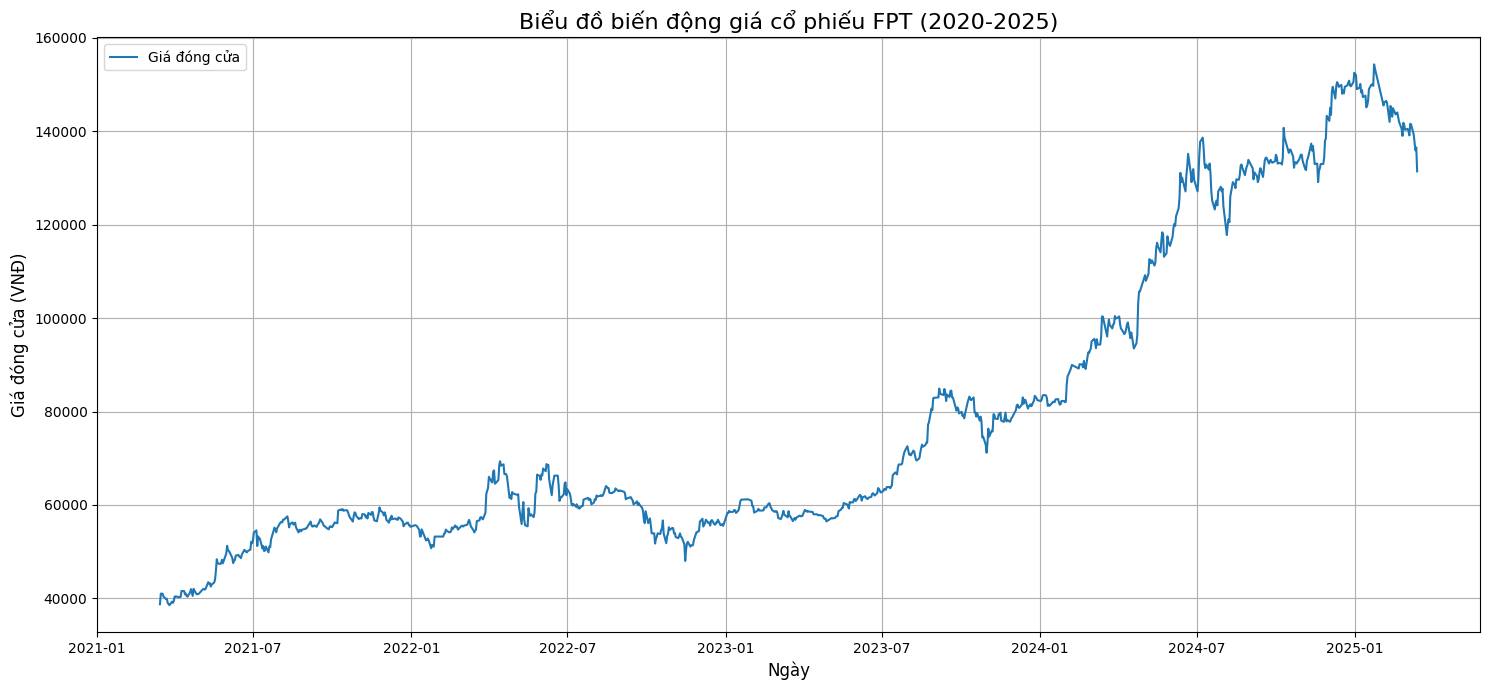

In [122]:
# --- Vẽ biểu đồ biến động giá cổ phiếu (Yêu cầu 1.2) ---
print("\n===================================================================")
print("   MỤC 1.2: VẼ BIỂU ĐỒ BIẾN ĐỘNG GIÁ CỔ PHIẾU FPT")
print("===================================================================")

plt.figure(figsize=(15, 7)) # Kích thước biểu đồ

# Vẽ đường biểu đồ
plt.plot(price_history_df['NGÀY'], price_history_df['GIÁ ĐÓNG CỬA'], label='Giá đóng cửa')

# Thiết lập tiêu đề và nhãn
plt.title('Biểu đồ biến động giá cổ phiếu FPT (2020-2025)', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá đóng cửa (VNĐ)', fontsize=12)

# Thêm lưới
plt.grid(True)

# Thêm chú thích
plt.legend()

# Tự động điều chỉnh các tham số để hiển thị đẹp hơn
plt.tight_layout()

# Lưu biểu đồ ra file
plt.savefig('fpt_stock_price_chart.png')

print("Đã lưu biểu đồ vào file 'fpt_stock_price_chart.png'.")
print("Biểu đồ sẽ được hiển thị ở đầu ra của cell này.")

In [123]:
# --- Cell 6: Chuẩn bị Dữ liệu Chỉ số Tài chính (Mục 2) ---
print("===================================================================")
print("   MỤC 2: BẮT ĐẦU CHUẨN BỊ BẢNG CHỈ SỐ TÀI CHÍNH")
print("===================================================================")

# 1. Liệt kê các chỉ số tài chính được yêu cầu
required_indicators = [
    'Biên lợi nhuận gộp', 
    'Biên lợi nhuận ròng', 
    'P/E', 
    'EPS (VNĐ/CP)', 
    'Tăng trưởng EPS', 
    'ROE LTM',  # Giả định ROE là ROE LTM (Trailing Twelve Months)
    'Nợ phải trả / Vốn chủ sở hữu', 
    'Khả năng thanh toán tổng quát', 
    'Vòng quay tài sản (vòng)',
    'Vốn chủ sở hữu', # Cần thiết để tính BVPS
    'Số lượng cổ phiếu lưu hành (Triệu CP)' # Cần thiết để tính BVPS
]

# * SỬA LỖI: Thêm .str.strip() để làm sạch cột 'CHỈ TIÊU' *
# Lỗi này xảy ra vì các giá trị trong cột 'CHỈ TIÊU' có thể chứa
# khoảng trắng (whitespace) ở đầu/cuối, khiến phép so sánh .isin() thất bại.
try:
    financial_indicator_df['CHỈ TIÊU'] = financial_indicator_df['CHỈ TIÊU'].str.strip()
    print("Đã làm sạch (strip) cột 'CHỈ TIÊU'.")
except Exception as e:
    print(f"Lỗi khi strip cột CHỈ TIÊU: {e}")
    # Vẫn tiếp tục, nhưng có thể sẽ lỗi ở bước lọc

# Lọc financial_indicator_df để chỉ lấy các hàng này
financial_selected_df = financial_indicator_df[financial_indicator_df['CHỈ TIÊU'].isin(required_indicators)]

# Kiểm tra nếu dataframe bị rỗng sau khi lọc
if financial_selected_df.empty:
    print("\n*** CẢNH BÁO: Bảng 'financial_selected_df' bị rỗng sau khi lọc. *")
    print("Điều này có nghĩa là không tìm thấy chỉ số nào trong 'required_indicators'.")
    print("Hãy kiểm tra lại tên các chỉ số trong list 'required_indicators'.")


# 2. Xoay bảng (Transpose)
financial_long_df = financial_selected_df.set_index('CHỈ TIÊU').transpose()
financial_long_df.index.name = 'QUÝ' # Đổi tên index

print("\nBảng chỉ số tài chính sau khi xoay:")
print(financial_long_df.head())

# 3. Tính toán 'Giá trị sổ sách (Book Value Per Share)'
# BVPS = Vốn chủ sở hữu / Số lượng cổ phiếu lưu hành
# Vốn chủ sở hữu: Đơn vị Tỷ đồng (x 1,000,000,000)
# Số lượng CP lưu hành: Đơn vị Triệu CP (x 1,000,000)
try:
    vcs_ty_dong = financial_long_df['Vốn chủ sở hữu']
    slcp_trieu_cp = financial_long_df['Số lượng cổ phiếu lưu hành (Triệu CP)']
    
    # Chuyển đổi sang số, phòng trường hợp vẫn là object
    vcs_ty_dong = pd.to_numeric(vcs_ty_dong, errors='coerce')
    slcp_trieu_cp = pd.to_numeric(slcp_trieu_cp, errors='coerce')
    
    financial_long_df['Giá trị sổ sách_BVPS'] = (vcs_ty_dong * 1_000_000_000) / (slcp_trieu_cp * 1_000_000)
    print("\nĐã tính toán thành công 'Giá trị sổ sách (BVPS)'.")

except KeyError as e:
    print(f"\nLỗi: Không tìm thấy cột cần thiết để tính BVPS: {e}")
    print("Bảng có thể vẫn bị rỗng hoặc tên chỉ số bị sai.")
except Exception as e:
    print(f"\nLỗi khi tính BVPS: {e}")

# 4. Tạo cột 'QuarterEnd' (Ngày cuối quý) để làm khóa
# Chuyển index 'Q4/2024' -> '2024-12-31'
def convert_quarter_to_date(quarter_str):
    if 'Q1' in quarter_str:
        return quarter_str.replace('Q1/', '03-31-')
    elif 'Q2' in quarter_str:
        return quarter_str.replace('Q2/', '06-30-')
    elif 'Q3' in quarter_str:
        return quarter_str.replace('Q3/', '09-30-')
    elif 'Q4' in quarter_str:
        return quarter_str.replace('Q4/', '12-31-')
    return None

financial_long_df['QuarterEnd'] = pd.to_datetime(financial_long_df.index.map(convert_quarter_to_date), format='%m-%d-%Y')
financial_long_df = financial_long_df.sort_values(by='QuarterEnd')

print("\nBảng chỉ số tài chính đã sẵn sàng để kết hợp:")
print(financial_long_df.head())

   MỤC 2: BẮT ĐẦU CHUẨN BỊ BẢNG CHỈ SỐ TÀI CHÍNH
Đã làm sạch (strip) cột 'CHỈ TIÊU'.

Bảng chỉ số tài chính sau khi xoay:
CHỈ TIÊU  Vốn chủ sở hữu    P/E  EPS (VNĐ/CP)  Tăng trưởng EPS  \
QUÝ                                                              
Q4/2024     3.579663e+13  26.89       1418.69             4.24   
Q3/2024     3.536418e+13  27.02       1419.96             3.68   
Q2/2024     3.273644e+13  24.72       1283.96             8.04   
Q1/2024     3.172710e+13  20.59       1231.15             4.69   
Q4/2023     2.994835e+13  19.32       1360.98            10.46   

CHỈ TIÊU  Biên lợi nhuận gộp  Biên lợi nhuận ròng  ROE LTM  \
QUÝ                                                          
Q4/2024                36.80                14.16    28.66   
Q3/2024                38.73                15.59    28.16   
Q2/2024                37.07                15.01    27.96   
Q1/2024                39.10                15.33    27.70   
Q4/2023                38.34               

In [124]:
# --- Chuẩn bị Dữ liệu Giá theo Quý (Mục 2) ---
print("\n===================================================================")
print("   MỤC 2: TÍNH TOÁN GIÁ CỔ PHIẾU TRUNG BÌNH THEO QUÝ")
print("===================================================================")

# Lấy danh sách các ngày cuối quý duy nhất
quarter_end_dates = financial_long_df['QuarterEnd'].unique()

quarterly_price_data = []

# Đảm bảo price_history_df đã được sắp xếp theo ngày
price_history_df = price_history_df.sort_values(by='NGÀY')

# 2. Vòng lặp qua từng ngày cuối quý
for end_date in quarter_end_dates:
    # 3. Xác định cửa sổ 29 ngày 
    start_date = end_date - pd.Timedelta(days=14)
    window_end_date = end_date + pd.Timedelta(days=14)
    
    # Lọc price_history_df trong cửa sổ
    window_df = price_history_df[
        (price_history_df['NGÀY'] >= start_date) & 
        (price_history_df['NGÀY'] <= window_end_date)
    ]
    
    if not window_df.empty:
        # 4. Tính giá đóng cửa trung bình
        avg_close_price = window_df['GIÁ ĐÓNG CỬA'].mean()
        
        quarterly_price_data.append({
            'QuarterEnd': end_date,
            'Giá đóng cửa quý TB': avg_close_price
        })

# Chuyển danh sách kết quả thành DataFrame
price_quarterly_df = pd.DataFrame(quarterly_price_data)

print("Đã tính xong giá trung bình theo quý:")
print(price_quarterly_df.head())


   MỤC 2: TÍNH TOÁN GIÁ CỔ PHIẾU TRUNG BÌNH THEO QUÝ
Đã tính xong giá trung bình theo quý:
  QuarterEnd  Giá đóng cửa quý TB
0 2021-03-31         40156.954762
1 2021-06-30         51186.021429
2 2021-09-30         56491.778095
3 2021-12-31         55527.495000
4 2022-03-31         62114.899500


In [125]:
# --- Kết hợp và Hoàn thiện Bảng dữ liệu mới (Mục 2) ---
print("\n===================================================================")
print("   MỤC 2: KẾT HỢP VÀ TẠO BẢNG DỮ LIỆU MỚI")
print("===================================================================")

# *** SỬA LỖI: Thêm .reset_index() để biến index 'Quy' thành một cột ***
financial_long_df_with_index = financial_long_df.reset_index()

# 1. Kết hợp (Merge) hai bảng
final_quarterly_df = pd.merge(
    financial_long_df_with_index,  # Dùng bảng đã reset_index
    price_quarterly_df, 
    on='QuarterEnd',
    how='inner' # Chỉ giữ lại các quý có đủ cả 2 loại dữ liệu
)

# Sắp xếp lại theo thời gian (quan trọng để tính toán thay đổi)
final_quarterly_df = final_quarterly_df.sort_values(by='QuarterEnd')

# 2. Tính toán lại 'Thay đổi giá' và '% thay đổi' theo quý
# Sử dụng .shift(1) để lấy giá của quý TRƯỚC ĐÓ
final_quarterly_df['Giá đóng cửa quý trước'] = final_quarterly_df['Giá đóng cửa quý TB'].shift(1)

# Thay đổi giá = Giá quý này - Giá quý trước
final_quarterly_df['Thay đổi giá của quý'] = final_quarterly_df['Giá đóng cửa quý TB'] - final_quarterly_df['Giá đóng cửa quý trước']

# % Thay đổi = (Thay đổi / Giá quý trước)
final_quarterly_df['%Thay đổi của quý'] = final_quarterly_df['Thay đổi giá của quý'] / final_quarterly_df['Giá đóng cửa quý trước']

# Xử lý giá trị NaN ở hàng đầu tiên (vì không có quý trước đó để so sánh)
final_quarterly_df = final_quarterly_df.fillna(0.0)

# 3. Lọc và sắp xếp các cột cuối cùng theo yêu cầu
final_columns = [
    'Giá đóng cửa quý TB',
    'Thay đổi giá của quý',
    '%Thay đổi của quý',
    'Biên lợi nhuận gộp', 
    'Biên lợi nhuận ròng', 
    'P/E', 
    'EPS (VNĐ/CP)', 
    'Tăng trưởng EPS', 
    'ROE LTM',
    'Nợ phải trả / Vốn chủ sở hữu', 
    'Khả năng thanh toán tổng quát', 
    'Vòng quay tài sản (vòng)',
    'Giá trị sổ sách_BVPS' # Tên mới cho Giá trị sổ sách
]

# Thêm cột 'Quy' vào danh sách để giữ lại trước khi set_index
final_columns_to_keep = ['QUÝ'] + final_columns

# Đảm bảo tất cả các cột đều tồn tại
final_columns_exist = [col for col in final_columns_to_keep if col in final_quarterly_df.columns]
final_quarterly_df = final_quarterly_df[final_columns_exist]

# 4. Đặt index là Quý/Năm cho dễ đọc (Dòng này bây giờ sẽ chạy đúng)
final_quarterly_df = final_quarterly_df.set_index('QUÝ')

# 5. In 5 dòng đầu tiên của bảng dữ liệu MỚI
print("\n--- 5 DÒNG ĐẦU TIÊN CỦA BẢNG DỮ LIỆU MỚI (MỤC 2) ---")
print(final_quarterly_df.head())

print("\n--- Thông tin (info) của bảng dữ liệu mới ---")
final_quarterly_df.info()

# Lưu lại bảng này để dùng cho Mục 3
final_quarterly_df.to_csv('final_quarterly_data_for_correlation.csv')
print("\nĐã lưu bảng dữ liệu mới vào file 'final_quarterly_data_for_correlation.csv'")


   MỤC 2: KẾT HỢP VÀ TẠO BẢNG DỮ LIỆU MỚI

--- 5 DÒNG ĐẦU TIÊN CỦA BẢNG DỮ LIỆU MỚI (MỤC 2) ---
         Giá đóng cửa quý TB  Thay đổi giá của quý  %Thay đổi của quý  \
QUÝ                                                                     
Q1/2021         40156.954762              0.000000           0.000000   
Q2/2021         51186.021429          11029.066667           0.274649   
Q3/2021         56491.778095           5305.756667           0.103656   
Q4/2021         55527.495000           -964.283095          -0.017069   
Q1/2022         62114.899500           6587.404500           0.118633   

         Biên lợi nhuận gộp  Biên lợi nhuận ròng    P/E  EPS (VNĐ/CP)  \
QUÝ                                                                     
Q1/2021               38.15                15.17  16.53        998.54   
Q2/2021               39.81                14.58  18.29       1102.00   
Q3/2021               37.26                15.75  22.06       1239.42   
Q4/2021               38.2

Lựa chọn các yếu tố nguy cơ (risk factors) tiềm năng cho mô hình tài chính

In [126]:
# Dữ liệu lấy từ bảng Lịch sử giá
final_quarterly_df.head()

,Giá đóng cửa quý TB,Thay đổi giá của quý,%Thay đổi của quý,Biên lợi nhuận gộp,Biên lợi nhuận ròng,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách_BVPS
QUÝ,,,,,,,,,,,,,
Q1/2021,40156.954762,0.000000,0.000000,38.15,15.17,16.53,998.54,4.77,24.82,125.41,1.80,0.18,2.174211e+07
Q2/2021,51186.021429,11029.066667,0.274649,39.81,14.58,18.29,1102.00,-1.69,25.35,134.23,1.74,0.19,2.210271e+07
Q3/2021,56491.778095,5305.756667,0.103656,37.26,15.75,22.06,1239.42,4.60,26.17,137.38,1.73,0.18,2.239446e+07
Q4/2021,55527.495000,-964.283095,-0.017069,38.25,14.57,21.79,1434.10,15.14,26.71,150.68,1.66,0.21,2.360216e+07
Q1/2022,62114.899500,6587.404500,0.118633,40.63,15.81,19.31,1129.31,13.10,26.86,142.17,1.70,0.18,2.092876e+07


In [127]:
# Dữ liệu lấy từ bảng Chỉ số tài chính công ty
financial_long_df.head()

CHỈ TIÊU,Vốn chủ sở hữu,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,Biên lợi nhuận gộp,Biên lợi nhuận ròng,ROE LTM,Vòng quay tài sản (vòng),Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Số lượng cổ phiếu lưu hành (Triệu CP),Giá trị sổ sách_BVPS,QuarterEnd
QUÝ,,,,,,,,,,,,,
Q1/2015,8.380860e+12,10.22,1068.47,1.64,19.55,6.33,26.85,0.39,147.51,1.80,397449264.0,2.108662e+07,2015-03-31
Q2/2015,9.924212e+12,10.41,1148.91,-7.60,19.32,6.33,24.84,0.42,127.54,1.78,397449264.0,2.496976e+07,2015-06-30
Q3/2015,9.972171e+12,10.69,978.90,-13.48,20.10,5.45,24.89,0.41,137.43,1.73,397449264.0,2.509042e+07,2015-09-30
Q4/2015,1.017824e+13,11.14,1658.23,26.57,20.66,7.47,26.95,0.42,155.28,1.64,399436093.0,2.548152e+07,2015-12-31
Q1/2016,1.064307e+13,9.81,752.57,-29.57,19.92,5.27,24.57,0.33,132.03,1.76,459344308.0,2.317014e+07,2016-03-31


In [128]:
price_history_df.head()

,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
0,2021-03-15,38801.35,39257.24,38548.07,38750.69,0.00,0.000000,1801400.0
1,2021-03-16,39003.96,41283.42,38801.35,41030.14,2279.45,0.058823,5171000.0
2,2021-03-17,41283.42,41283.42,40523.60,40928.83,-101.31,-0.002469,2573500.0
3,2021-03-18,41030.14,41030.14,40523.60,41030.14,101.31,0.002475,2177500.0
4,2021-03-19,40523.60,40776.87,40219.67,40422.29,-607.85,-0.014815,2923500.0


In [129]:
# Thêm cột Quý (Q1-Q4) vào price_history_df
price_history_df['QUÝ'] = 'Q' + price_history_df['NGÀY'].dt.quarter.astype(str) + '/' + price_history_df['NGÀY'].dt.year.astype(str)

price_history_df.head()

,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG,QUÝ
0,2021-03-15,38801.35,39257.24,38548.07,38750.69,0.00,0.000000,1801400.0,Q1/2021
1,2021-03-16,39003.96,41283.42,38801.35,41030.14,2279.45,0.058823,5171000.0,Q1/2021
2,2021-03-17,41283.42,41283.42,40523.60,40928.83,-101.31,-0.002469,2573500.0,Q1/2021
3,2021-03-18,41030.14,41030.14,40523.60,41030.14,101.31,0.002475,2177500.0,Q1/2021
4,2021-03-19,40523.60,40776.87,40219.67,40422.29,-607.85,-0.014815,2923500.0,Q1/2021


In [130]:
# Lấy dataframe chỉ gồm cột Quý và cột Giá đóng cửa
price_quarter_df = price_history_df[['QUÝ', 'GIÁ ĐÓNG CỬA']]
price_quarter_df.head()

,QUÝ,GIÁ ĐÓNG CỬA
0,Q1/2021,38750.69
1,Q1/2021,41030.14
2,Q1/2021,40928.83
3,Q1/2021,41030.14
4,Q1/2021,40422.29


In [131]:
# Join 2 datafram final_quarterly_df và financial_df trên với nhau
merged_df = pd.merge(
    final_quarterly_df,
    financial_long_df,
    on='QUÝ',
    how='inner'
)

merged_df.head()

,Giá đóng cửa quý TB,Thay đổi giá của quý,%Thay đổi của quý,Biên lợi nhuận gộp_x,Biên lợi nhuận ròng_x,P/E_x,EPS (VNĐ/CP)_x,Tăng trưởng EPS_x,ROE LTM_x,Nợ phải trả / Vốn chủ sở hữu_x,...,Tăng trưởng EPS_y,Biên lợi nhuận gộp_y,Biên lợi nhuận ròng_y,ROE LTM_y,Vòng quay tài sản (vòng)_y,Nợ phải trả / Vốn chủ sở hữu_y,Khả năng thanh toán tổng quát_y,Số lượng cổ phiếu lưu hành (Triệu CP),Giá trị sổ sách_BVPS_y,QuarterEnd
QUÝ,,,,,,,,,,,,,,,,,,,,,
Q1/2021,40156.954762,0.000000,0.000000,38.15,15.17,16.53,998.54,4.77,24.82,125.41,...,4.77,38.15,15.17,24.82,0.18,125.41,1.80,9.074693e+08,2.174211e+07,2021-03-31
Q2/2021,51186.021429,11029.066667,0.274649,39.81,14.58,18.29,1102.00,-1.69,25.35,134.23,...,-1.69,39.81,14.58,25.35,0.19,134.23,1.74,9.074693e+08,2.210271e+07,2021-06-30
Q3/2021,56491.778095,5305.756667,0.103656,37.26,15.75,22.06,1239.42,4.60,26.17,137.38,...,4.60,37.26,15.75,26.17,0.18,137.38,1.73,9.075516e+08,2.239446e+07,2021-09-30
Q4/2021,55527.495000,-964.283095,-0.017069,38.25,14.57,21.79,1434.10,15.14,26.71,150.68,...,15.14,38.25,14.57,26.71,0.21,150.68,1.66,9.075516e+08,2.360216e+07,2021-12-31
Q1/2022,62114.899500,6587.404500,0.118633,40.63,15.81,19.31,1129.31,13.10,26.86,142.17,...,13.10,40.63,15.81,26.86,0.18,142.17,1.70,1.097027e+09,2.092876e+07,2022-03-31


In [132]:
# join 2 dataframe merged_df và price_quarter_df với nhau
merged_df_2 = pd.merge(
    price_quarter_df,
    merged_df,
    on='QUÝ',
    how='inner'
)
merged_df_2

,QUÝ,GIÁ ĐÓNG CỬA,Giá đóng cửa quý TB,Thay đổi giá của quý,%Thay đổi của quý,Biên lợi nhuận gộp_x,Biên lợi nhuận ròng_x,P/E_x,EPS (VNĐ/CP)_x,Tăng trưởng EPS_x,...,Tăng trưởng EPS_y,Biên lợi nhuận gộp_y,Biên lợi nhuận ròng_y,ROE LTM_y,Vòng quay tài sản (vòng)_y,Nợ phải trả / Vốn chủ sở hữu_y,Khả năng thanh toán tổng quát_y,Số lượng cổ phiếu lưu hành (Triệu CP),Giá trị sổ sách_BVPS_y,QuarterEnd
0,Q1/2021,38750.69,40156.954762,0.000000,0.00000,38.15,15.17,16.53,998.54,4.77,...,4.77,38.15,15.17,24.82,0.18,125.41,1.80,9.074693e+08,2.174211e+07,2021-03-31
1,Q1/2021,41030.14,40156.954762,0.000000,0.00000,38.15,15.17,16.53,998.54,4.77,...,4.77,38.15,15.17,24.82,0.18,125.41,1.80,9.074693e+08,2.174211e+07,2021-03-31
2,Q1/2021,40928.83,40156.954762,0.000000,0.00000,38.15,15.17,16.53,998.54,4.77,...,4.77,38.15,15.17,24.82,0.18,125.41,1.80,9.074693e+08,2.174211e+07,2021-03-31
3,Q1/2021,41030.14,40156.954762,0.000000,0.00000,38.15,15.17,16.53,998.54,4.77,...,4.77,38.15,15.17,24.82,0.18,125.41,1.80,9.074693e+08,2.174211e+07,2021-03-31
4,Q1/2021,40422.29,40156.954762,0.000000,0.00000,38.15,15.17,16.53,998.54,4.77,...,4.77,38.15,15.17,24.82,0.18,125.41,1.80,9.074693e+08,2.174211e+07,2021-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Q4/2024,150800.00,149260.000000,15100.972381,0.11256,36.80,14.16,26.89,1418.69,4.24,...,4.24,36.80,14.16,28.66,0.25,101.17,1.99,1.471069e+09,2.433375e+07,2024-12-31
949,Q4/2024,149800.00,149260.000000,15100.972381,0.11256,36.80,14.16,26.89,1418.69,4.24,...,4.24,36.80,14.16,28.66,0.25,101.17,1.99,1.471069e+09,2.433375e+07,2024-12-31
950,Q4/2024,149600.00,149260.000000,15100.972381,0.11256,36.80,14.16,26.89,1418.69,4.24,...,4.24,36.80,14.16,28.66,0.25,101.17,1.99,1.471069e+09,2.433375e+07,2024-12-31
951,Q4/2024,150500.00,149260.000000,15100.972381,0.11256,36.80,14.16,26.89,1418.69,4.24,...,4.24,36.80,14.16,28.66,0.25,101.17,1.99,1.471069e+09,2.433375e+07,2024-12-31


In [133]:
# Bỏ cột Quy để tất cả giá trị đều thuộc kiểu numemaric
main_merged_df = merged_df_2.drop(columns=['QUÝ'])
main_merged_df.head()

,GIÁ ĐÓNG CỬA,Giá đóng cửa quý TB,Thay đổi giá của quý,%Thay đổi của quý,Biên lợi nhuận gộp_x,Biên lợi nhuận ròng_x,P/E_x,EPS (VNĐ/CP)_x,Tăng trưởng EPS_x,ROE LTM_x,...,Tăng trưởng EPS_y,Biên lợi nhuận gộp_y,Biên lợi nhuận ròng_y,ROE LTM_y,Vòng quay tài sản (vòng)_y,Nợ phải trả / Vốn chủ sở hữu_y,Khả năng thanh toán tổng quát_y,Số lượng cổ phiếu lưu hành (Triệu CP),Giá trị sổ sách_BVPS_y,QuarterEnd
0,38750.69,40156.954762,0.0,0.0,38.15,15.17,16.53,998.54,4.77,24.82,...,4.77,38.15,15.17,24.82,0.18,125.41,1.8,907469273.0,2.174211e+07,2021-03-31
1,41030.14,40156.954762,0.0,0.0,38.15,15.17,16.53,998.54,4.77,24.82,...,4.77,38.15,15.17,24.82,0.18,125.41,1.8,907469273.0,2.174211e+07,2021-03-31
2,40928.83,40156.954762,0.0,0.0,38.15,15.17,16.53,998.54,4.77,24.82,...,4.77,38.15,15.17,24.82,0.18,125.41,1.8,907469273.0,2.174211e+07,2021-03-31
3,41030.14,40156.954762,0.0,0.0,38.15,15.17,16.53,998.54,4.77,24.82,...,4.77,38.15,15.17,24.82,0.18,125.41,1.8,907469273.0,2.174211e+07,2021-03-31
4,40422.29,40156.954762,0.0,0.0,38.15,15.17,16.53,998.54,4.77,24.82,...,4.77,38.15,15.17,24.82,0.18,125.41,1.8,907469273.0,2.174211e+07,2021-03-31


In [134]:
# Lựa chọn các yếu tố nguy cơ tiềm năng cho mô hình tài chính
correlation_matrix = main_merged_df.corr(method='pearson')
correlation_matrix['GIÁ ĐÓNG CỬA']

GIÁ ĐÓNG CỬA                             1.000000
Giá đóng cửa quý TB                      0.976302
Thay đổi giá của quý                     0.470252
%Thay đổi của quý                        0.196643
Biên lợi nhuận gộp_x                    -0.431285
Biên lợi nhuận ròng_x                   -0.001678
P/E_x                                    0.818215
EPS (VNĐ/CP)_x                           0.600774
Tăng trưởng EPS_x                        0.106226
ROE LTM_x                                0.609060
Nợ phải trả / Vốn chủ sở hữu_x          -0.587057
Khả năng thanh toán tổng quát_x          0.591652
Vòng quay tài sản (vòng)_x               0.670179
Giá trị sổ sách_BVPS_x                   0.580606
Vốn chủ sở hữu                           0.893374
P/E_y                                    0.818215
EPS (VNĐ/CP)_y                           0.600774
Tăng trưởng EPS_y                        0.106226
Biên lợi nhuận gộp_y                    -0.431285
Biên lợi nhuận ròng_y                   -0.001678


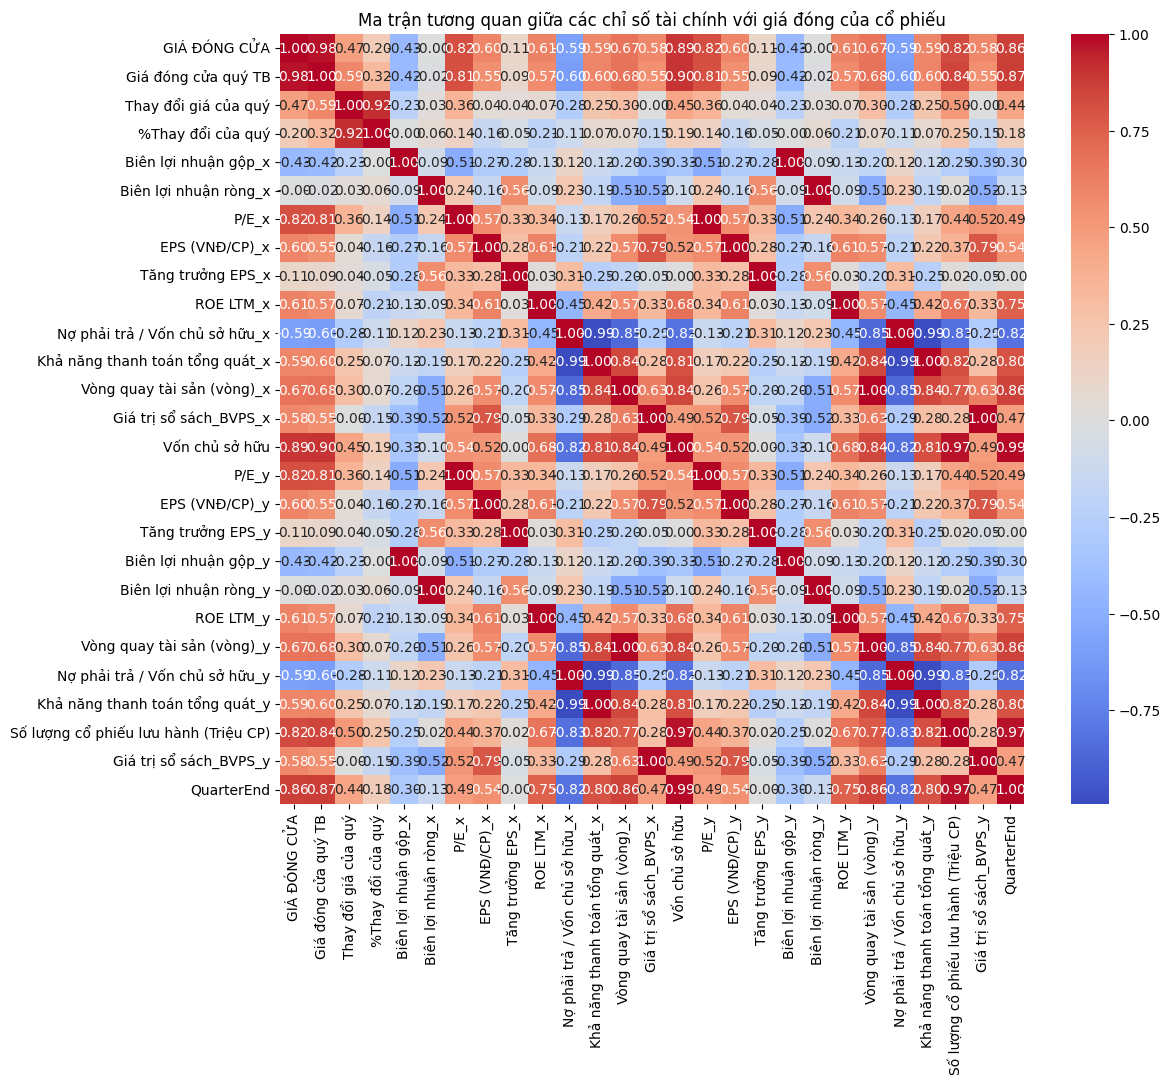

In [135]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Ma trận tương quan giữa các chỉ số tài chính với giá đóng của cổ phiếu')
plt.show()

Dựa trên ma trận tương quan giữa các chỉ số tài chính với GIÁ ĐÓNG CỬA của cổ phiếu, ta có thể nhận xét như sau:

- Vốn chủ sở hữu (0.893374) và P/E (0.818215) có độ tương quan dương rất mạnh với GÍA ĐÓNG CỦA. Trong đó vốn chủ sở hữu có tương quan dương lớn nhất.

- Chỉ số EPS (0.600774), ROE LTM (0.609060), và vòng quay tài sản (vòng) (0.670179) có tương quan mạnh vừa với GIÁ ĐÓNG CỬA.

- Khả năng thanh toán tổng quát (0.591652) và Giá trị sổ sách (0.580606) có độ tương quan dương trung bình với GÍA ĐÓNG CỬA.

- Tăng trưởng EPS (0.106226) có độ tương quan dương yếu với GIÁ ĐÓNG CỬA.

- Biên lợi nhuận gộp (-0.431285) và Vốn chủ sở hữu (-0.587057) có mức tương quan âm mạnh với GIÁ ĐÓNG CỬA.

- Biên lợi nhuận ròng (-0.001678) có mức tương quan âm rất yếu với GIÁ ĐÓNG CỬA.

